<a href="https://colab.research.google.com/github/ViniciusCastillo/BootcampAlura_Proj6_Concessao_Credito/blob/main/Notebooks/Analise_Base_Aprovados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import math as math
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# define cores
cinza1, cinza2, cinza3 = '#E5E5E5', '#D8D8D8', '#BFBEBE'
cinza4, cinza5, cinza6 = '#929497', '#808080', '#76787B'
cinza7, cinza8, cinza9 = '#646369', '#555655', '#414040'
amarelo1, amarelo2, amarelo3 = '#FFFFCC', '#FFFF66', '#FFFF00'
amarelo4, amarelo5, amarelo6 = '#CCCC00', '#999900', '#666600'
laranja1, laranja2, laranja3 = '#FFA500', '#FF8C00', '#FF4500'
verde1, verde2 = '#32CD32', '#ADFF2F'

plt.rcParams['figure.facecolor'] = 'black'
plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['ytick.color'] = cinza4
plt.rcParams['xtick.color'] = cinza4
plt.rcParams['legend.edgecolor'] = cinza6
plt.rcParams['legend.facecolor'] = 'black'
plt.rcParams['text.color'] = cinza3

In [ ]:
def negrito(texto):
  return '$\\bf{'+texto.replace(' ','\ ')+'}$'

def formatar_grafico(ax, xlimite, ylimite, cor=cinza4, fonte=13):
  ax.spines['bottom'].set_color(cor)
  ax.spines['left'].set_color(cor)
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)
  ax.tick_params(bottom=False, color=cor)
  ax.set_xlim(xlimite)
  ax.set_ylim(ylimite)
  for i in ax.get_yticklabels() + ax.get_xticklabels():
    i.set_fontsize(fonte)
    i.set_color(cor)
  plt.xlabel('')

def colorir_legenda(legenda, cores, cortitulo=cinza4):
  legenda.get_title().set_color(cortitulo)
  i = 0
  for texto in legenda.get_texts():
    texto.set_color(cores[i])
    i+=1

def legenda_linhas(serie, cores, distancia, ajuste=0, ajuste_ind=[0]):
  ajuste_ = ajuste
  i = 0
  for valor in serie.index:
    if len(ajuste_ind) == len(serie):
      ajuste_ = ajuste + ajuste_ind[i]
    ax.text(distancia, serie.loc[valor]+ajuste_, negrito(valor), fontsize=10, color=cores[i])
    i+=1

def plota_seta(distancia, inicial, final, cor, horientacao='v', ls=':', lw=.5):
  if horientacao == 'v':
    plt.arrow(x=distancia, y=inicial, dx=0, dy=final-inicial, color=cor, ls=ls, 
              lw=lw, head_width=.5, head_length=.3, length_includes_head=True)
  elif horientacao == 'h':
    plt.arrow(y=distancia, x=inicial, dy=0, dx=final-inicial, color=cor, ls=ls, 
              lw=lw, head_width=.5, head_length=.3, length_includes_head=True)
  else:
    print('Valor do parâmentro horientação inexistente')

In [ ]:
df_aprovados = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/Avaliacao_Credito/main/dados/clientes_aprovados.csv')
print (df_aprovados.shape)
df_aprovados.head()

(1048575, 3)


,ID_Cliente,Mes_referencia,Faixa_atraso
0,5001711,0,nenhum empréstimo
1,5001711,-1,1-29 dias
2,5001711,-2,1-29 dias
3,5001711,-3,1-29 dias
4,5001712,0,pagamento realizado


In [ ]:
faixas_dict = {
    'nenhum empréstimo': 0,
    'pagamento realizado': 1,
    '1-29 dias': 2,
    '30-59 dias': 3,
    '60-89 dias': 4,
    '90-119 dias': 5,
    '120-149 dias': 6,
    '>150 dias': 7
    }
faixas_dict

{'1-29 dias': 2,
 '120-149 dias': 6,
 '30-59 dias': 3,
 '60-89 dias': 4,
 '90-119 dias': 5,
 '>150 dias': 7,
 'nenhum empréstimo': 0,
 'pagamento realizado': 1}

In [ ]:
abertura = df_aprovados[['ID_Cliente','Mes_referencia']].groupby('ID_Cliente').min()
abertura.columns = ['Abertura']
fim = df_aprovados[['ID_Cliente','Mes_referencia']].groupby('ID_Cliente').max()
fim.columns = ['Fim']
janela = abertura.join(fim)
janela['Janela'] = janela['Fim'] - janela['Abertura']
janela.head()

,Abertura,Fim,Janela
ID_Cliente,,,
5001711,-3,0,3
5001712,-18,0,18
5001713,-21,0,21
5001714,-14,0,14
5001715,-59,0,59


In [ ]:
# verifica se algum cliente fica algum mês sem dado dentro da janela
contagem = df_aprovados[['ID_Cliente','Mes_referencia']].groupby('ID_Cliente').count()
contagem.columns = ['Contagem']
contagem = contagem.join(janela)
contagem[contagem['Contagem']-contagem['Janela'] != 1]

,Contagem,Abertura,Fim,Janela
ID_Cliente,,,,


In [ ]:
aprovados = df_aprovados.join(janela, on='ID_Cliente')
aprovados['MOB'] = aprovados['Mes_referencia'] - aprovados['Abertura']
aprovados['Cod_Faixa_Atraso'] = aprovados['Faixa_atraso'].map(faixas_dict)
aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Fim,Janela,MOB,Cod_Faixa_Atraso
0,5001711,0,nenhum empréstimo,-3,0,3,3,0
1,5001711,-1,1-29 dias,-3,0,3,2,2
2,5001711,-2,1-29 dias,-3,0,3,1,2
3,5001711,-3,1-29 dias,-3,0,3,0,2
4,5001712,0,pagamento realizado,-18,0,18,18,1


In [ ]:
qtd_clientes = janela.reset_index()[['ID_Cliente','Abertura']].groupby('Abertura').count()
qtd_clientes.columns = ['Qtd_Clientes']
qtd_clientes.head()

,Qtd_Clientes
Abertura,
-60,415
-59,406
-58,440
-57,400
-56,470


In [ ]:
MOBs = pd.DataFrame(aprovados.MOB.unique(), columns=['MOB'])
MOBs.sort_values('MOB', inplace=True)
MOBs.reset_index(drop=True, inplace=True)
MOBs.head()

,MOB
0,0
1,1
2,2
3,3
4,4


In [ ]:
cod_faixas = dict(aprovados.groupby(['Cod_Faixa_Atraso','Faixa_atraso']).count().index)
taxa_por_faixa = MOBs.sort_values('MOB')
qtd_clientes_total = qtd_clientes.sum()[0]
taxa_por_faixa['Qtd_Clientes'] = qtd_clientes_total
taxa_por_faixa=taxa_por_faixa.set_index('MOB')
for i in range(2,len(cod_faixas)):
  primeiro_risco_i = aprovados.query('Cod_Faixa_Atraso >= @i')[['MOB','ID_Cliente']].groupby(['ID_Cliente']).min().reset_index()
  MOBs_risco_i = primeiro_risco_i.merge(MOBs, how="cross", suffixes=('_inicial',''))
  MOBs_risco_i['Risco'] = 0
  MOBs_risco_i.loc[MOBs_risco_i['MOB'] >= MOBs_risco_i['MOB_inicial'],'Risco'] = 1
  r = MOBs_risco_i[['MOB','Risco']].groupby(['MOB']).sum()
  r.columns=['Qtd_Risco']
  taxa_por_faixa = taxa_por_faixa.join(r)
  coluna = cod_faixas[i]
  taxa_por_faixa[coluna] = taxa_por_faixa['Qtd_Risco']/taxa_por_faixa['Qtd_Clientes']
  taxa_por_faixa[coluna].fillna(0, inplace=True)
  taxa_por_faixa.drop('Qtd_Risco', axis=1, inplace=True)

taxa_por_faixa.drop(['Qtd_Clientes'], axis=1, inplace=True)
taxa_por_faixa = taxa_por_faixa*100
taxa_por_faixa.head()

,1-29 dias,30-59 dias,60-89 dias,90-119 dias,120-149 dias,>150 dias
MOB,,,,,,
0,58.314668,0.030445,0.002175,0.002175,0.002175,0.002175
1,77.296945,1.161248,0.017397,0.008698,0.008698,0.008698
2,81.139502,2.587800,0.115255,0.019572,0.017397,0.017397
3,82.539959,3.685985,0.223986,0.069588,0.030445,0.030445
4,83.375014,4.738502,0.339241,0.104382,0.069588,0.034794


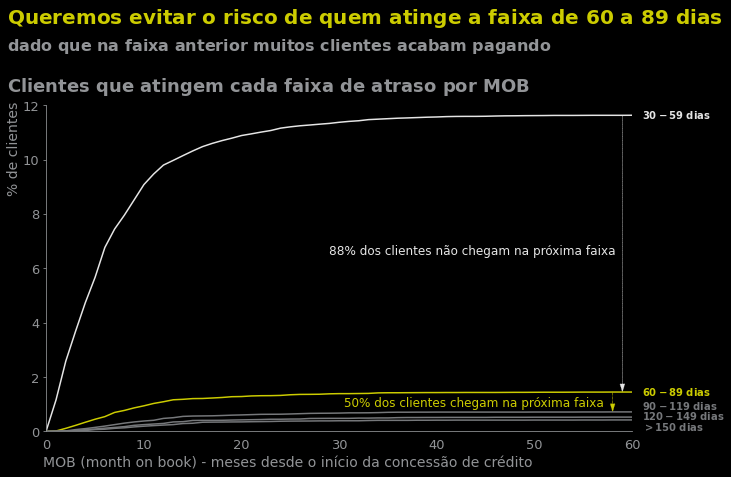

In [ ]:
xfim = taxa_por_faixa.shape[0]-1
yfim = math.ceil(taxa_por_faixa.loc[xfim,'30-59 dias'])

relacao1 = taxa_por_faixa.loc[xfim,'60-89 dias']/taxa_por_faixa.loc[xfim,'30-59 dias']
relacao2 = taxa_por_faixa.loc[xfim,'90-119 dias']/taxa_por_faixa.loc[xfim,'60-89 dias']

cores = [cinza1,amarelo4,cinza6,cinza6,cinza6]

ax = taxa_por_faixa.drop(['1-29 dias'], axis=1).plot(figsize=(10.5, 6), color=cores, legend=False)
formatar_grafico(ax, [0, xfim], [0, yfim])
ax.text(-4, 15, negrito('Queremos evitar o risco de quem atinge a faixa de 60 a 89 dias'), fontsize=20, color=cores[1])
ax.text(-4, 14, negrito('dado que na faixa anterior muitos clientes acabam pagando'), fontsize=16, color=cinza4)
ax.text(-4, 12.5, negrito('Clientes que atingem cada faixa de atraso por MOB'), fontsize=18, color=cinza4)
ax.text(-4, 8.8, '% de clientes', fontsize=14, rotation='vertical', color=cinza4)
ax.text(-0.3, -1.3, 'MOB (month on book) - meses desde o início da concessão de crédito', fontsize=14, color=cinza4)
plota_seta(59, taxa_por_faixa.loc[59,'30-59 dias'], taxa_por_faixa.loc[59,'60-89 dias'], cores[0])
ax.text(29, 6.5, f'{1-relacao1:.0%} dos clientes não chegam na próxima faixa', fontsize=12, color=cores[0])
plota_seta(58, taxa_por_faixa.loc[58,'60-89 dias'], taxa_por_faixa.loc[58,'90-119 dias'], cores[1])
ax.text(30.5, 0.9, f'{relacao2:.0%} dos clientes chegam na próxima faixa', fontsize=12, color=cores[1])
legenda_linhas(taxa_por_faixa.drop(['1-29 dias'], axis=1).loc[60], cores, 61, ajuste_ind=[-.13,-.13,0.1,-0.1,-.4])

In [ ]:
ref_risco = '60-89 dias'
aprovados['ref_risco'] = faixas_dict[ref_risco]
aprovados['Risco'] = 0
aprovados.loc[aprovados['Cod_Faixa_Atraso'] >= aprovados['ref_risco'],'Risco'] = 1
aprovados.drop('ref_risco', axis=1, inplace=True)
primeiro_risco = aprovados.query('Risco == 1')[['MOB','ID_Cliente']].groupby(['ID_Cliente']).min().reset_index()
MOBs_risco = primeiro_risco.merge(MOBs, how="cross", suffixes=('_inicial',''))
MOBs_risco['Risco'] = 0
MOBs_risco.loc[MOBs_risco['MOB'] >= MOBs_risco['MOB_inicial'],'Risco'] = 1
MOBs_risco = MOBs_risco.join(janela, on='ID_Cliente')
MOBs_risco.head()

,ID_Cliente,MOB_inicial,MOB,Risco,Abertura,Fim,Janela
0,5002126,5,0,0,-55,0,55
1,5002126,5,1,0,-55,0,55
2,5002126,5,2,0,-55,0,55
3,5002126,5,3,0,-55,0,55
4,5002126,5,4,0,-55,0,55


In [ ]:
vintage = aprovados[['ID_Cliente','Abertura','MOB']].groupby(['Abertura','MOB']).count().reset_index()
vintage = vintage.join(qtd_clientes, on='Abertura')
vintage.drop(['ID_Cliente'], axis=1, inplace=True)
risco = MOBs_risco[['Abertura','MOB','Risco']].groupby(['Abertura','MOB']).sum()
risco.columns=['Qtd_Risco']
vintage = vintage.join(risco, on=['Abertura','MOB'])
vintage['Taxa_Risco'] = vintage['Qtd_Risco']/vintage['Qtd_Clientes']
vintage['Taxa_Risco'].fillna(0, inplace=True)
print('Valor máximo da Taxa_Risco: ', vintage.Taxa_Risco.max(),'\n')
vintage.head()

Valor máximo da Taxa_Risco:  0.047325102880658436 



,Abertura,MOB,Qtd_Clientes,Qtd_Risco,Taxa_Risco
0,-60,0,415,0.0,0.0
1,-60,1,415,0.0,0.0
2,-60,2,415,0.0,0.0
3,-60,3,415,0.0,0.0
4,-60,4,415,0.0,0.0


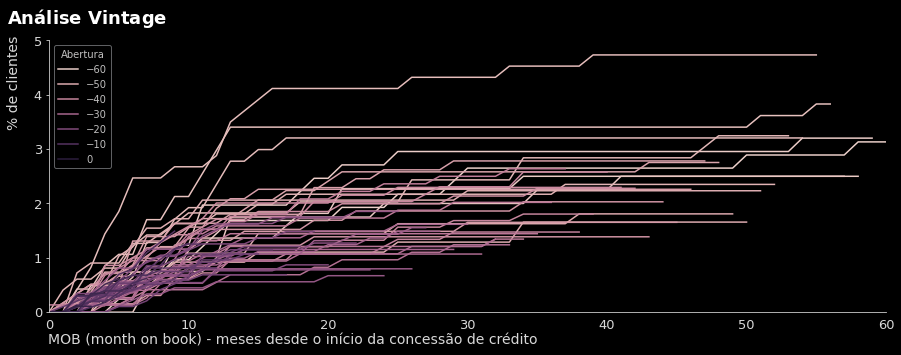

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.lineplot(data=vintage.groupby(['MOB','Abertura']).max()*100, x='MOB', y='Taxa_Risco', hue='Abertura')
ax.text(-3, 5.3, negrito('Análise Vintage'), fontsize=18, color='white')
ax.text(-3, 3.4, '% de clientes', fontsize=14, rotation='vertical', color=cinza2)
ax.text(-0.1, -0.6, 'MOB (month on book) - meses desde o início da concessão de crédito', fontsize=14, color=cinza2)
formatar_grafico(ax, [0, xfim], [0, math.ceil(vintage.Taxa_Risco.max()*100)], cor=cinza2)

In [ ]:
cliente_nasceu_risco = list(primeiro_risco.query('MOB == 0')['ID_Cliente'])
cliente_nasceu_risco

[5024071]

In [ ]:
aprovados.query('ID_Cliente == @cliente_nasceu_risco').tail()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Fim,Janela,MOB,Cod_Faixa_Atraso,Risco
269193,5024071,-34,pagamento realizado,-38,0,38,4,1,0
269194,5024071,-35,pagamento realizado,-38,0,38,3,1,0
269195,5024071,-36,1-29 dias,-38,0,38,2,2,0
269196,5024071,-37,1-29 dias,-38,0,38,1,2,0
269197,5024071,-38,>150 dias,-38,0,38,0,7,1


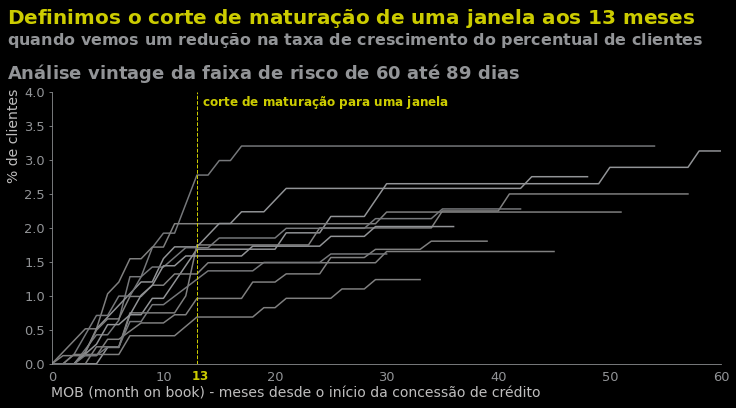

In [ ]:
corte = 13
cores = [cinza4,cinza5,cinza6,cinza5,cinza4,cinza5,cinza6,cinza5,cinza4,cinza5,cinza6]
lista = [x for x in range(-60,-29,3)]
vintage_cut = vintage.query('Abertura in @lista').groupby(['MOB','Abertura']).max()*100
ymax=math.ceil(vintage_cut.Taxa_Risco.max())

plt.figure(figsize=(12,5))
ax = sns.lineplot(data=vintage_cut, x='MOB', y='Taxa_Risco', hue='Abertura', palette=cores, legend=False)
ax.text(-4, 5, negrito(f'Definimos o corte de maturação de uma janela aos {corte} meses'), fontsize=20, color=amarelo4)
ax.text(-4, 4.7, negrito('quando vemos um redução na taxa de crescimento do percentual de clientes'), fontsize=16, color=cinza4)
ax.text(-4, 4.2, negrito('Análise vintage da faixa de risco de 60 até 89 dias'), fontsize=18, color=cinza4)
ax.text(-4, 2.7, '% de clientes', fontsize=14, rotation='vertical', color=cinza3)
ax.text(-0.1, -0.5, 'MOB (month on book) - meses desde o início da concessão de crédito', fontsize=14, color=cinza3)
ax.text(corte+.5, ymax-.2, negrito('corte de maturação para uma janela'), fontsize=12, color=amarelo4)
ax.text(corte-.5, -.23, negrito(str(corte)), fontsize=12, color=amarelo4)
ax.axvline(x=corte, color=amarelo4, ls='--', lw='1')
formatar_grafico(ax, [0, xfim], [0, ymax])

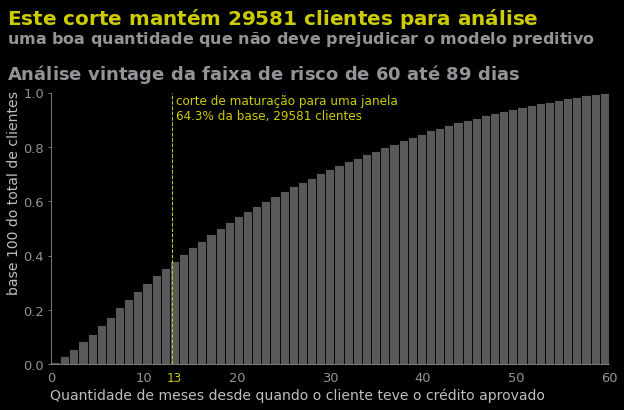

In [ ]:
corte_valor, _ = janela.loc[janela['Janela'] >= corte].shape
texto = f'{round(corte_valor/qtd_clientes_total,3):.1%} da base, {corte_valor} clientes'

plt.figure(figsize=(10,5))
ax = sns.histplot(data=janela, x='Janela', cumulative=True, stat='density', bins=61, color=cinza6)
ax.text(-4.7, 1.25, negrito(f'Este corte mantém {corte_valor} clientes para análise'), fontsize=20, color=amarelo4)
ax.text(-4.7, 1.18, negrito('uma boa quantidade que não deve prejudicar o modelo preditivo'), fontsize=16, color=cinza4)
ax.text(-4.7, 1.05, negrito('Análise vintage da faixa de risco de 60 até 89 dias'), fontsize=18, color=cinza4)

ax.text(-4.7, 0.27, 'base 100 do total de clientes', fontsize=14, rotation='vertical', color=cinza3)
ax.text(-0.1, -0.13, 'Quantidade de meses desde quando o cliente teve o crédito aprovado', fontsize=14, color=cinza3)
ax.text(corte+.5, .9, 'corte de maturação para uma janela\n'+texto, fontsize=12, color=amarelo4)
ax.text(corte-.5, -.063, str(corte), fontsize=12, color=amarelo4)
ax.axvline(x=corte, color=amarelo4, ls='--', lw='1')
formatar_grafico(ax, [0, xfim], [0, 1])

In [ ]:
saida = aprovados.loc[aprovados['Janela'] >= corte][['ID_Cliente','Risco']].groupby('ID_Cliente').max()
saida.shape

(29581, 1)

In [ ]:
saida.to_csv('target.cvs')